# Random projection for amino acids data

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io import loadmat
%matplotlib inline 

In [2]:
# Load amino
amino=loadmat('datasets/amino.mat');
A=amino['X']
sz=tuple([int(n) for n in amino['DimX'][0]])

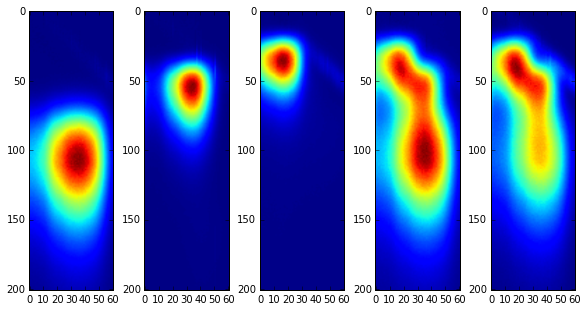

In [3]:
# Visualize samples
plt.rcParams['figure.figsize']=(10,5)
for kk in range(5):
    plt.subplot(1,5,kk+1)
    plt.imshow(A[kk,:,:])

In [4]:
# Compute random projection
A1=(A.transpose((1,2,0)) * np.random.randn(5)).sum(2)
A2=(A.transpose((1,2,0)) * np.random.randn(5)).sum(2)

In [57]:
# Compute SVD
U1,S1,V1=np.linalg.svd(A1);
U1=np.matrix(U1[:,range(3)])
V1=np.matrix(V1[range(3),:]).T
S1=S1[range(3)]
B=np.diag(1/S1) * U1.T * A2 * V1

In [19]:
# Compute eigen decomposition
Lambda, P=np.linalg.eig(B)

In [81]:
# Recover the factors
U=[np.diag(np.linalg.inv(P) *np.matrix(np.diag(1/S1))*U1.T*S*V1 * P) for S in A]
V=U1*np.diag(S1)*P
W=V1*np.linalg.inv(P).T

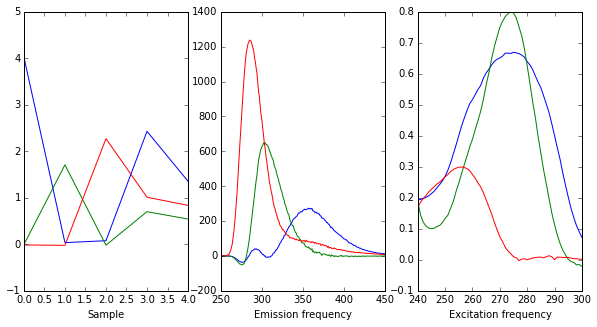

In [82]:
# Plot the factors
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(1,3,1)
sgn=np.sign(np.median(np.array(U),axis=0))
plt.plot(U*sgn)
plt.xlabel('Sample')

plt.subplot(1,3,2)
sgn=np.sign(np.median(np.array(V),axis=0))
plt.plot(amino['EmAx'].T, V*np.diag(sgn))
plt.xlabel('Emission frequency')

plt.subplot(1,3,3)
sgn=np.sign(np.median(np.array(W),axis=0))
plt.plot(amino['ExAx'].T, W*np.diag(sgn))
plt.xlabel('Excitation frequency')
